In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [44]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices[0])
tf.config.experimental.set_memory_growth(physical_devices[0], True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [45]:
from tensorflow.keras.optimizers import RMSprop

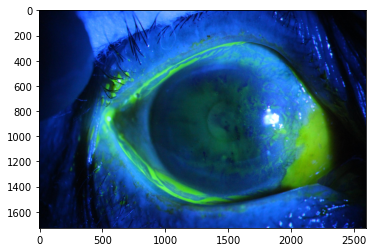

In [46]:
img = image.load_img('dataset/images/1.jpg')
plt.imshow(img)

In [47]:
cv2.imread('dataset/images/1.jpg').shape

(1728, 2592, 3)

In [48]:
cv2.imread('dataset/images/50.jpg').shape

(1728, 2592, 3)

In [49]:
images = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [50]:
import pandas as pd

df = pd.read_csv('dataset/labels.csv')
df.head()

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3


In [51]:
df.drop('type', axis=1, inplace=True)
df.drop('grade', axis=1, inplace=True)

df.head()

,name,category
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0


In [52]:
df['category']= df['category'].map(str)

print(df.head())

    name category
0  1.jpg        0
1  2.jpg        0
2  3.jpg        0
3  4.jpg        0
4  5.jpg        0


In [53]:
valid_df = pd.read_csv('dataset/validation.csv')
valid_df.head()

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3


In [54]:
valid_df.drop('type', axis=1, inplace=True)
valid_df.drop('grade', axis=1, inplace=True)

valid_df.head()

,name,category
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0


In [55]:
valid_df['category']= valid_df['category'].map(str)

In [56]:
train_dataset = images.flow_from_dataframe(df, directory = './dataset/images/', x_col='name', y_col='category', target_size=(250, 250), batch_size=3, class_mode="categorical")
valid_dataset = validation.flow_from_dataframe(valid_df, directory='./dataset/images/', x_col='name', y_col='category', target_size=(250, 250), batch_size=3, class_mode="categorical")

Found 712 validated image filenames belonging to 3 classes.
Found 321 validated image filenames belonging to 3 classes.


In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(250, 250,3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
model.compile(
    loss='binary_crossentropy',
    optimizer = RMSprop(lr=0.001),
    metrics=['accuracy']
)

In [59]:
model_fit = model.fit(train_dataset, steps_per_epoch=3, epochs=20, validation_data=valid_dataset)

Epoch 1/20
3/3 [==============================] - 5s 2s/step - loss: 10.4258 - accuracy: 0.4907 - val_loss: 2.5037 - val_accuracy: 0.6667
Epoch 2/20
3/3 [==============================] - 4s 2s/step - loss: 1.5895 - accuracy: 0.6667 - val_loss: 0.6621 - val_accuracy: 0.6573
Epoch 3/20
3/3 [==============================] - 4s 2s/step - loss: 0.6596 - accuracy: 0.6667 - val_loss: 0.6714 - val_accuracy: 0.6262
Epoch 4/20
3/3 [==============================] - 4s 2s/step - loss: 0.6526 - accuracy: 0.6667 - val_loss: 0.6750 - val_accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 4s 2s/step - loss: 0.6729 - accuracy: 0.6667 - val_loss: 0.6407 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 4s 2s/step - loss: 0.6408 - accuracy: 0.6667 - val_loss: 0.6463 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 4s 2s/step - loss: 0.6507 - accuracy: 0.6667 - val_loss: 0.6392 - val_accuracy: 0.6667
Epoch 8/20
3/3 [========================

In [60]:
model.save('model.h5')